# Part 2: Deep Learning and TensorFlow

In this notebook, we will introduce **deep learning** concepts and implement a basic neural network using **TensorFlow** and **Keras**. TensorFlow is an open-source deep learning framework developed by Google, and Keras is a high-level API that makes building neural networks simple and intuitive.

---

## What is Deep Learning?

**Deep learning** is a subset of machine learning that involves neural networks with many layers (hence "deep"). Unlike traditional machine learning algorithms, which often require manual feature extraction, deep learning models automatically learn features from raw data.

---

## Why TensorFlow?

- **TensorFlow** is one of the most popular libraries for building deep learning models.
- It provides both low-level and high-level APIs for flexibility and ease of use.
- **Keras**, which is built into TensorFlow, allows for rapid prototyping and experimentation.

---

### Key Concepts in Deep Learning:

1. **Neural Network Architecture**:
   - Deep networks have multiple hidden layers, each of which extracts higher-level features from the input.
   - The more layers (or "depth") in the network, the more complex the patterns it can learn.

2. **Activation Functions**:
   - Introduce non-linearity into the network to learn complex patterns.
   - Common functions: **ReLU**, **Sigmoid**, **Softmax**.

3. **Loss Function**:
   - Measures the difference between the predicted and actual outputs.
   - For classification problems, we often use **categorical cross-entropy**.

4. **Optimizer**:
   - The algorithm used to update the weights in the network based on the error. 
   - Common optimizers: **Gradient Descent**, **Adam**.

---

### Step 1: Installing TensorFlow

You can install TensorFlow by running the following command:



In [3]:
# !pip install tensorflow

### Step 2: Import TensorFlow and Load the MNIST Dataset

We will use the MNIST dataset for this example. The MNIST dataset contains 70,000 grayscale images of handwritten digits (0-9), each of size 28x28 pixels.

11490434/11490434 [==============================] - 2s 0us/step


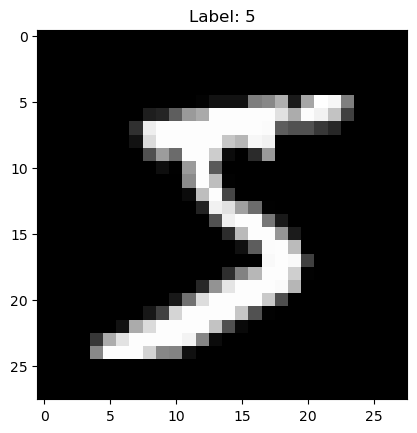

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Load the MNIST dataset
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalize the images to the range [0, 1]
train_images = train_images / 255.0
test_images = test_images / 255.0

# Visualize the first image
plt.imshow(train_images[0], cmap='gray')
plt.title(f'Label: {train_labels[0]}')
plt.show()

### Step 3: Building the Neural Network Model

We will use the Sequential API from Keras to build a simple feedforward neural network with:

- Flatten layer: Converts 2D images (28x28) into 1D vectors (784).
- Dense layers: Fully connected layers for feature extraction and classification.

In [2]:
# Build the model
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),  # Flatten the 28x28 input images
    layers.Dense(128, activation='relu'),  # First hidden layer with 128 neurons and ReLU activation
    layers.Dense(10, activation='softmax') # Output layer with 10 neurons (for 10 digit classes)
])

# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


### Step 4: Compiling the Model

Before training the model, we need to compile it by specifying the loss function, optimizer, and metrics.

In [3]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### Step 5: Training the Model

We will now train the model on the MNIST dataset. During training, the model will learn to recognize handwritten digits by adjusting its weights based on the loss function.

In [4]:
# Train the model
history = model.fit(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels))

Epoch 1/5


2024-09-17 07:26:31.001936: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1875/1875 [==============================] - 2s 1ms/step - loss: 0.2592 - accuracy: 0.9262 - val_loss: 0.1375 - val_accuracy: 0.9602
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1129 - accuracy: 0.9664 - val_loss: 0.0961 - val_accuracy: 0.9715
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0781 - accuracy: 0.9763 - val_loss: 0.0806 - val_accuracy: 0.9759
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0599 - accuracy: 0.9810 - val_loss: 0.0762 - val_accuracy: 0.9763
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0452 - accuracy: 0.9859 - val_loss: 0.0791 - val_accuracy: 0.9762


### Step 6: Evaluating the Model

After training, we will evaluate the model on the test dataset to see how well it generalizes to unseen data.

In [5]:
# Evaluate the model on the test dataset
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'\nTest accuracy: {test_acc}')

313/313 - 0s - loss: 0.0791 - accuracy: 0.9762 - 198ms/epoch - 633us/step

Test accuracy: 0.9761999845504761


### Step 7: Visualizing Training Progress

We will plot the model’s accuracy and loss during training to visualize how well the model is learning.

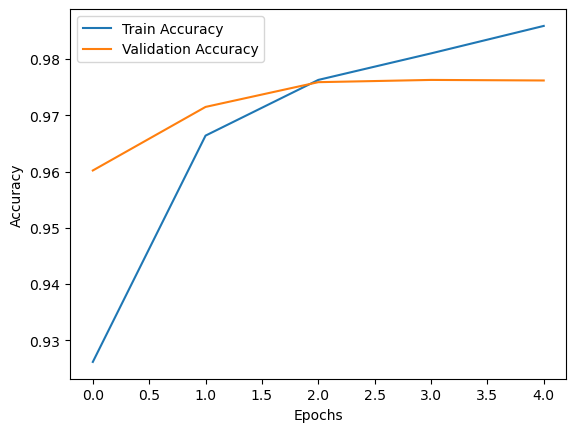

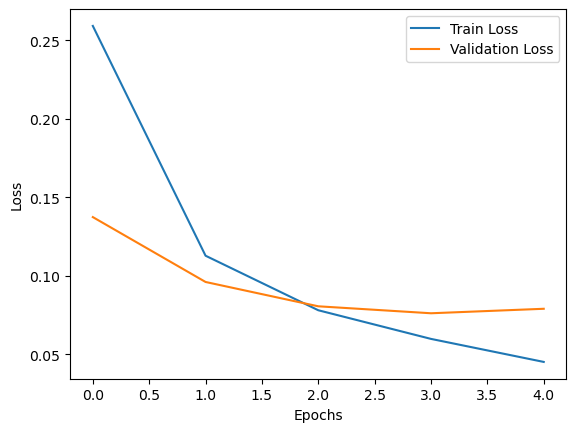

In [6]:
# Plot training & validation accuracy and loss
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Conclusion

In this notebook, we:

- Introduced deep learning and its key concepts.
- Built a simple neural network using TensorFlow and Keras.
- Trained the model on the MNIST dataset to classify handwritten digits.
- Evaluated the model and visualized its training progress.


---